<a href="https://colab.research.google.com/github/ReillyOareVT/HydroLearners_Proj/blob/main/eda/Static_EDA_and_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Static Data EDA**
**Author:** Emma Reilly Oare
<br>**Date:** April 17, 2025
<br>**Purpose:** Exploratory data analysis (EDA) of all static attributes for later feature engineering. These datasets will be used for clustering and mean regression.

In [100]:
# Read in libs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Show all columns
pd.set_option('display.max_columns', None)

In [3]:
# Only clone if the repo doesn't already exist
if not os.path.exists('/content/HydroLearners_Proj'):
    !git clone https://github.com/ReillyOareVT/HydroLearners_Proj

# Change directory
BASE_DIR = '/content/HydroLearners_Proj'
os.chdir(BASE_DIR)

# Confirm location
!pwd

Cloning into 'HydroLearners_Proj'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 57 (delta 12), reused 23 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 15.25 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/HydroLearners_Proj


## Step 1: Read in Data

In [4]:
# Define path
static_path = os.path.join(BASE_DIR, 'eda', 'processed_data', 'joined_static_df.xlsx')

# Read in df
static_df = pd.read_excel(static_path).drop(columns = 'Unnamed: 0')

In [5]:
# Display df
static_df

Basin ID  % Evaporites  % Ice and Glaciers  % Metamorphics  % No Data  \
0      AT000001           0.0               0.553          23.464        0.0   
1      AT000002           0.0               0.000          88.549        0.0   
2      AT000003           0.0               0.112          84.653        0.0   
3      AT000004           0.0               0.000          59.940        0.0   
4      AT000005           0.0               0.000          15.582        0.0   
...         ...           ...                 ...             ...        ...   
13511  UAGR0017           0.0               0.000           0.000        0.0   
13512  UAGR0018           0.0               0.000           0.000        0.0   
13513  UAGR0019           0.0               0.000           0.000        0.0   
13514  UAGR0020           0.0               0.000          22.366        0.0   
13515  UAGR0021           0.0               0.000           0.000        0.0   

       % Acid Plutonic Rocks  % Basic Putonic Rocks  \
0                      2.657                  0.042   
1                      0.000                  0.000   
2                      0.000                  0.000   
3                      0.000                  0.000   
4                      0.000                  0.000   
...                      ...                    ...   
13511                  0.000                  0.000   
13512                  0.000                  0.000   
13513                  0.000                  0.000   
13514                 43.474                  0.000   
13515                  0.000                  0.000   

       % ntermedite Plutonic Rocks  % Pyroclastics  \
0                             0.19             0.0   
1                             0.00             0.0   
2                             0.00             0.0   
3                             0.00             0.0   
4                             0.00             0.0   
...                            ...             ...   
13511                         0.00             0.0   
13512                         0.00             0.0   
13513                         0.00             0.0   
13514                         0.00             0.0   
13515                         0.00             0.0   

       % Carbonate Sedimentary Rocks  % Mixed Sedimentary Rocks  \
0                             38.753                      5.521   
1                              4.181                      7.270   
2                             13.194                      1.969   
3                             40.060                      0.000   
4                             82.065                      0.885   
...                              ...                        ...   
13511                         42.724                      0.000   
13512                         79.460                      6.341   
13513                         85.825                      0.000   
13514                          0.000                     34.160   
13515                          0.000                    100.000   

       % Siliciclastic Sedimentary Rocks  % Unconsolidated Sediments  \
0                                  3.888                      22.064   
1                                  0.000                       0.000   
2                                  0.000                       0.070   
3                                  0.000                       0.000   
4                                  0.000                       0.000   
...                                  ...                         ...   
13511                             57.276                       0.000   
13512                             14.198                       0.000   
13513                             14.175                       0.000   
13514                              0.000                       0.000   
13515                              0.000                       0.000   

       % Acid Volcanic Rocks  % Basic Volcanic Rocks  \
0         

## Step 2. Exploratory Data Analysis

### Step 2a. Preliminary, Group-Based EDA
Based on the DataCleaning notebook, we have a good idea of which columns come from which datasets. We'll look at these groups individually first.

#### Geology

In [6]:
# Identify % geology columns
geology_cols = [
    '% Evaporites', '% Ice and Glaciers', '% Metamorphics', '% No Data',
    '% Acid Plutonic Rocks', '% Basic Putonic Rocks', '% ntermedite Plutonic Rocks',
    '% Pyroclastics', '% Carbonate Sedimentary Rocks', '% Mixed Sedimentary Rocks',
    '% Siliciclastic Sedimentary Rocks', '% Unconsolidated Sediments',
    '% Acid Volcanic Rocks', '% Basic Volcanic Rocks', '% Intermediate Volcanic Rocks',
    '% Water Bodies'
]

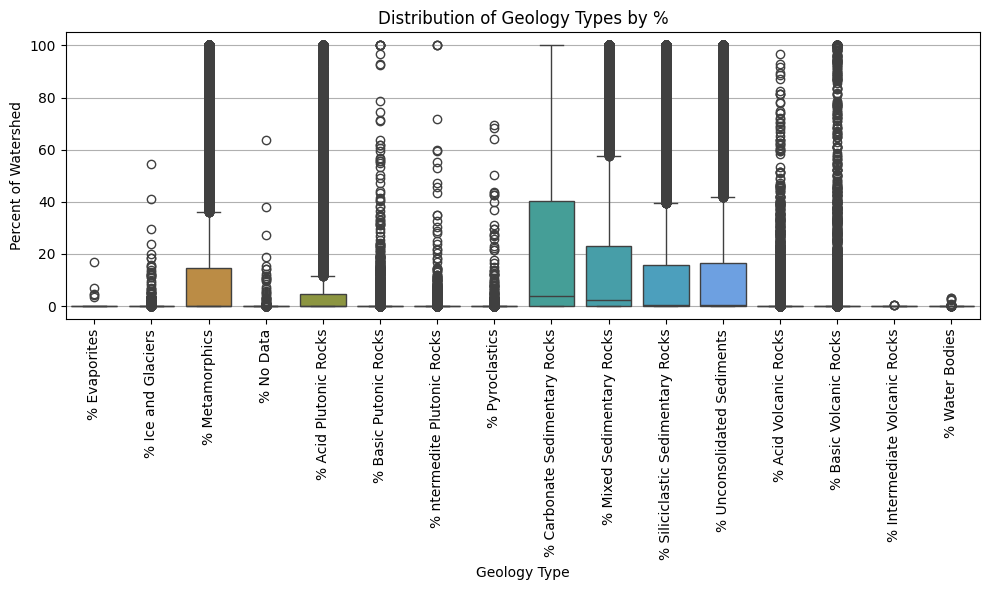

In [7]:
# Create boxplot of % geology types
melted = static_df[geology_cols].melt(var_name='Geology Type', value_name='Percent of Watershed')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Geology Type', y='Percent of Watershed', hue = 'Geology Type')
plt.xticks(rotation=90)
plt.title('Distribution of Geology Types by %')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

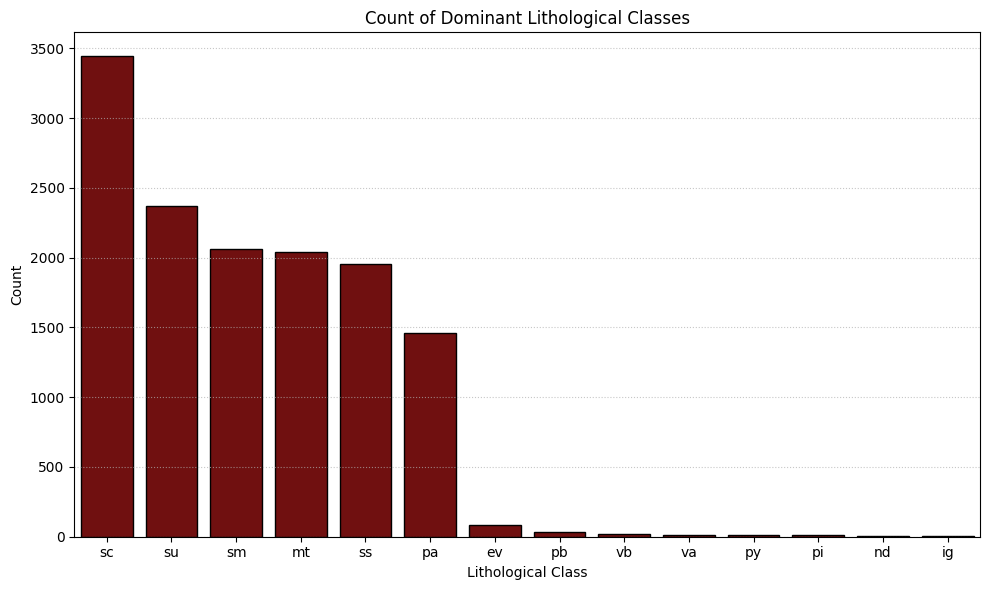

In [8]:
# Plot bar plot of dominant lithological class
plt.figure(figsize=(10, 6))
sns.countplot(data=static_df, x='Lithological Dominant Class',
              order=static_df['Lithological Dominant Class'].value_counts().index,
              color = 'maroon', edgecolor = 'k')
plt.title('Count of Dominant Lithological Classes')
plt.xlabel('Lithological Class')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

#### Hydrology Attributes

In [9]:
# Identify hydrology attribute columns
num_things_cols = [
    '# of Upstream Dams',	'# of Upstream Reservoirs',	'# of Upstream Lakes'
]
storage_cols =[
    'Total Area of Upstream Lakes',	'Total Upstream Lake Volume'
]

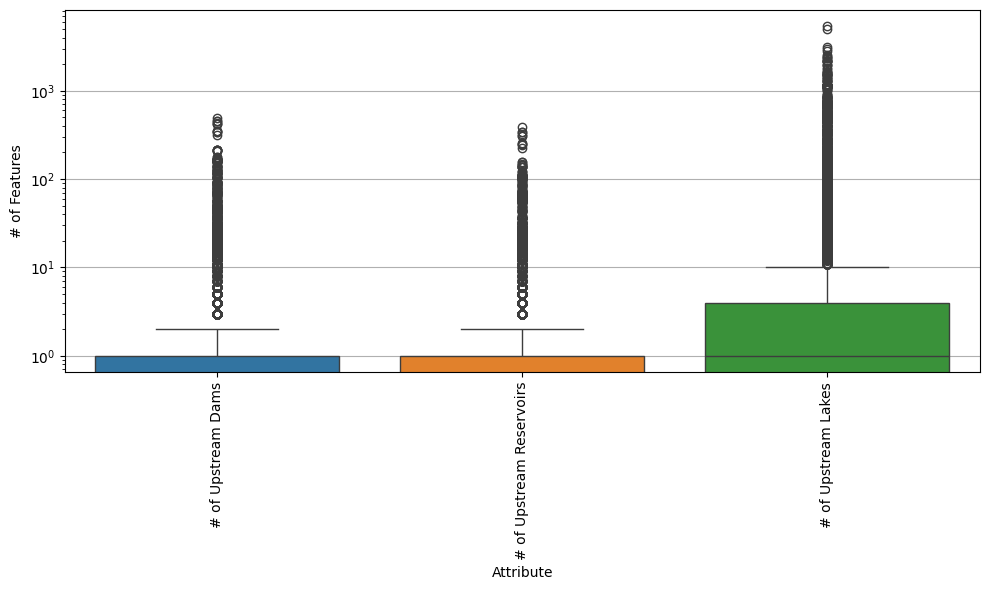

In [10]:
# Create boxplot of features
melted = static_df[num_things_cols].melt(var_name='Attribute', value_name='# of Features')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Attribute', y='# of Features', hue = 'Attribute')
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis='y')

plt.show()

In [11]:
# Display summary stats for lake info
static_df[storage_cols].describe()

Total Area of Upstream Lakes  Total Upstream Lake Volume
count                  13516.000000                1.351600e+04
mean                      54.301458                1.011519e+03
std                      583.551797                1.335122e+04
min                        0.000000                0.000000e+00
25%                        0.000000                0.000000e+00
50%                        0.000000                0.000000e+00
75%                        2.670000                2.202250e+01
max                    45825.360000                1.301789e+06

#### Hydrology & Meteorology

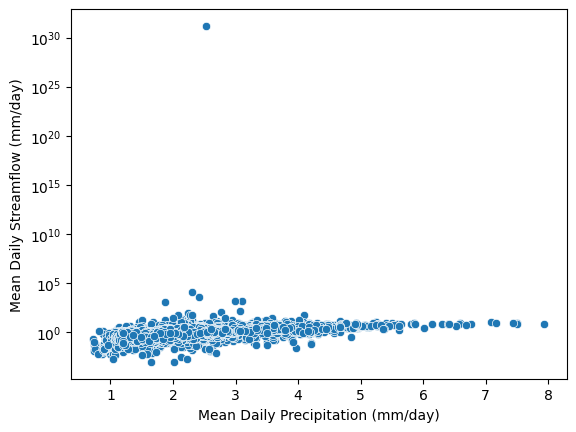

In [12]:
# Initial scatterplot of mean discharge vs mean precipitation
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Daily Precipitation (mm/day)')
plt.yscale('log')
plt.show()

Whoops! So clearly there is an outlier for streamflow. It is likely due to an incorrect data entry or something similar, so we'll just remove data that is unrealistic.

In [50]:
# Drop outlier row
static_df = static_df[static_df['Mean Daily Streamflow (mm/day)'] < 100]

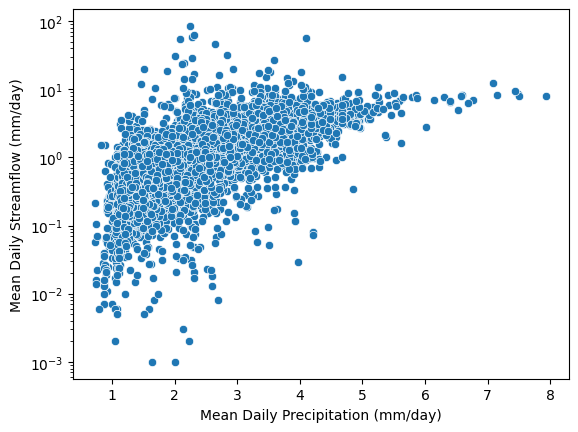

In [51]:
# Again: scatterplot of mean discharge vs mean precipitation
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Daily Precipitation (mm/day)')
plt.yscale('log')
plt.show()

Next, we'll just look at the other meteological features in general.

In [52]:
# Identify numerical meteorological columns
meteo_cols = [
    'Ratio of Mean Daily Streamflow/Precipitation',
    'Streamflow Precipitation Elasticity',
    '5% Flow Quantile (mm/day)',
    '95% Flow Quantile (mm/day)',
    'Days/Year with No Flow',
    'Mean Daily Precipitation (mm/day)',
    'Mean Daily PET (mm/day)',
    'Ratio of PET/Precipitation',
    'Fraction of Snow on Days <0 C',
    'Days/Year of High Precipitation',
    'Avg Duration of High Precipitation',
    'Days/Year of Low Precipitation',
    'Avg Duration of Low Precipitation',
]

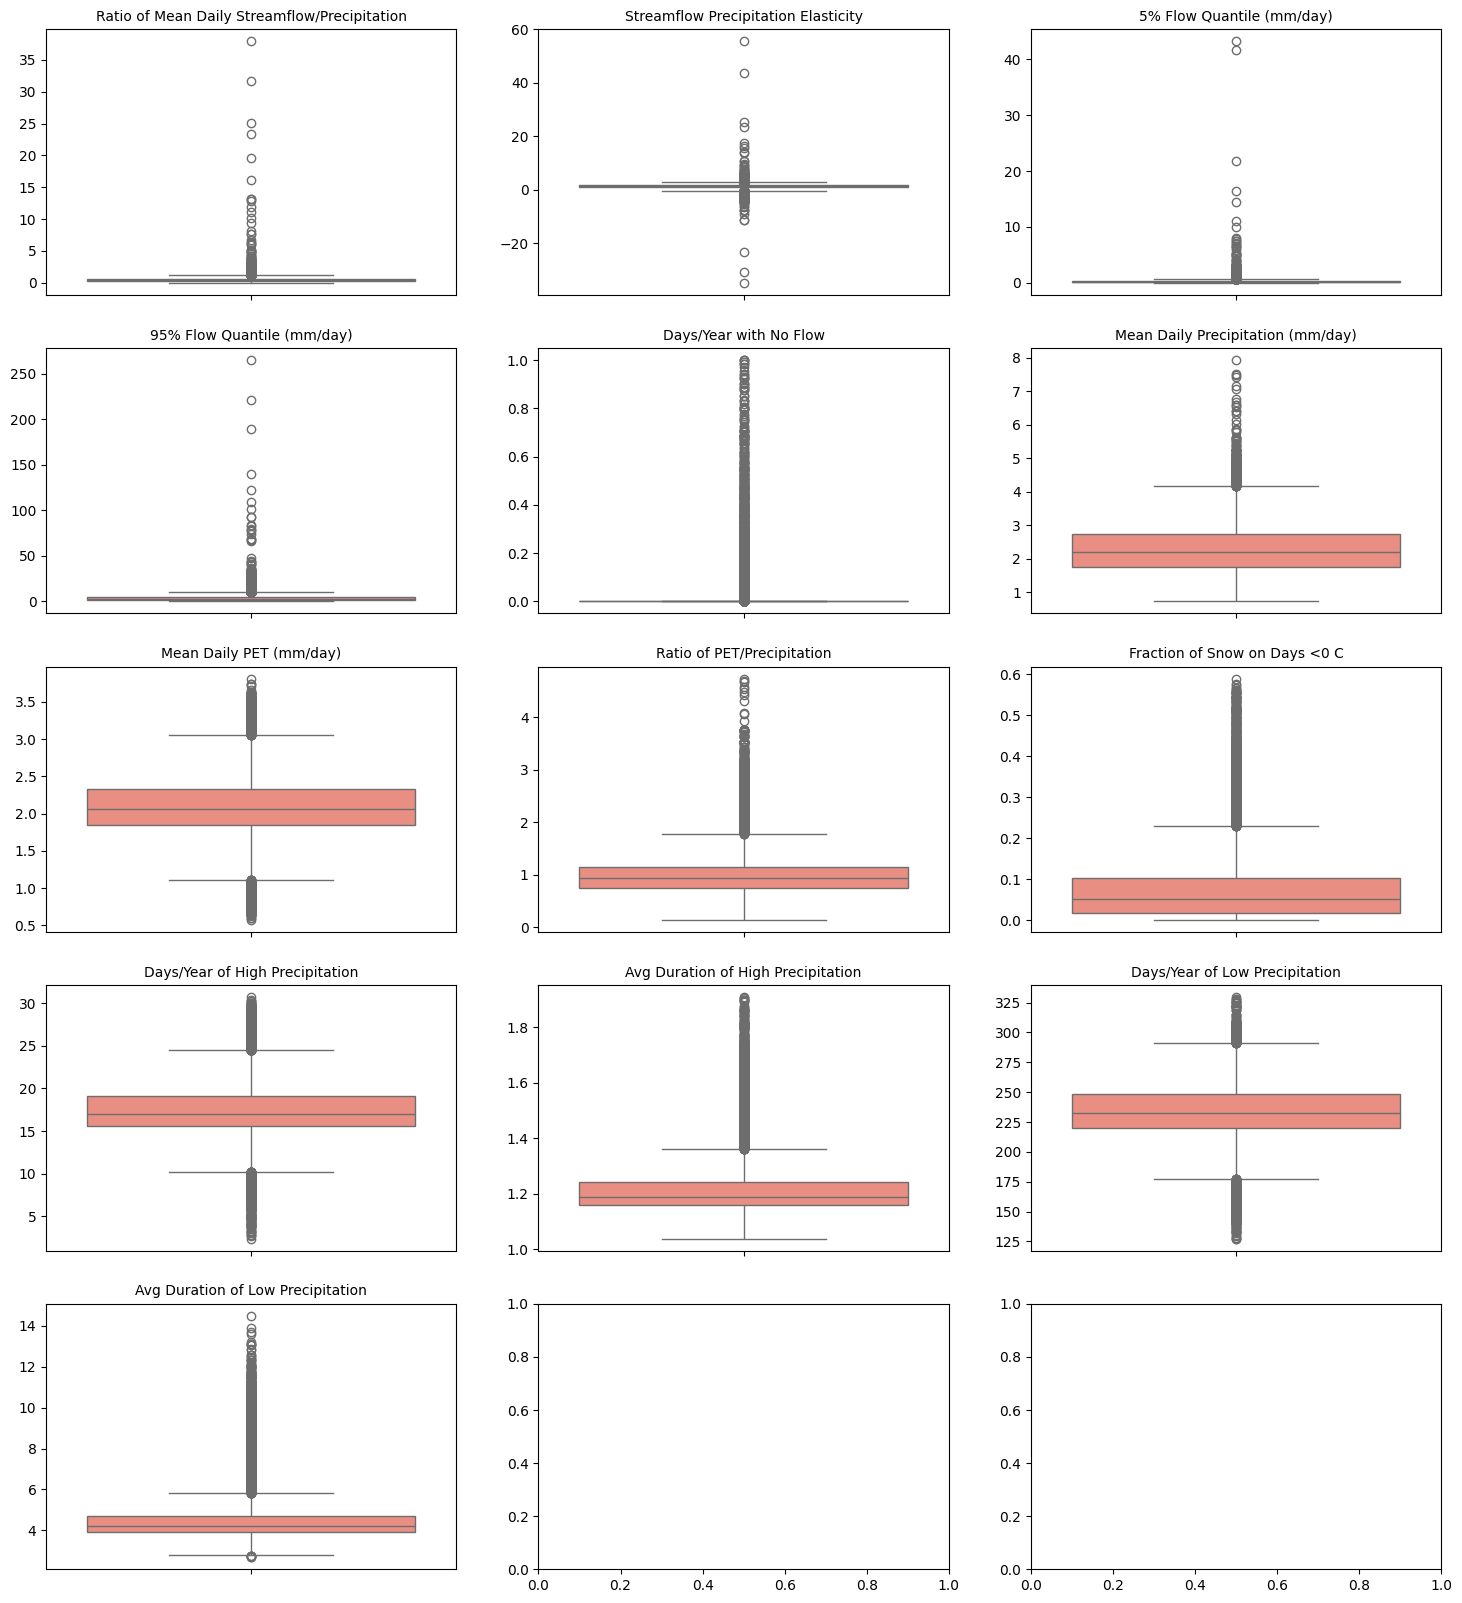

In [54]:
# Identify num of rows and col for boxplot grid
n_cols = 3
n_rows = (len(meteo_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(meteo_cols):
    ax = axes[i]
    sns.boxplot(data=static_df, y=col, ax=ax, color = 'salmon')  # or add `x='region'` if needed
    ax.set_title(col, fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

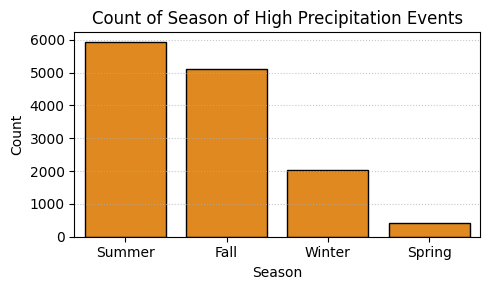

In [55]:
# Plot bar plot of high precip month
plt.figure(figsize=(5, 3))
sns.countplot(data=static_df, x='Season of High Precipitation Events',
              order=static_df['Season of High Precipitation Events'].value_counts().index,
              color = 'darkorange', edgecolor = 'k')
plt.title('Count of Season of High Precipitation Events')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

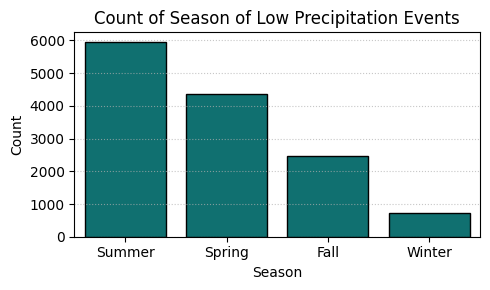

In [56]:
# Plot bar plot of low precip month
plt.figure(figsize=(5, 3))
sns.countplot(data=static_df, x='Season of Low Precipitation Events',
              order=static_df['Season of Low Precipitation Events'].value_counts().index,
              color = 'teal', edgecolor = 'k')
plt.title('Count of Season of Low Precipitation Events')
plt.xlabel('Season')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

#### Soil Static Attributes

In [57]:
# Identify columns of interest
root_depth_cols = [
    'Mean Root Depth (cm)',
    'Max Root Depth (cm)',
    'Min Root Depth (cm)',
    '5% Quantile Root Depth (cm)',
    '25% Quantile Root Depth (cm)',
    '50% Quantile Root Depth (cm)',
    '75% Quantile Root Depth (cm)',
    '90% Quantile Root Depth (cm)'
]

water_content_cols = [
    'Mean Available Water Content (mm)',
    'Max Available Water Content (mm)',
    'Min Available Water Content (mm)',
    '5% Quantile Water Content (mm)',
    '25% Quantile Water Content (mm)',
    '50% Quantile Water Content (mm)',
    '75% Quantile Water Content (mm)',
    '90% Quantile Water Content (mm)'
]

sand_cols = [
    'Mean % Sand in Soil',
    'Max % Sand in Soil',
    'Min % Sand in Soil',
    '5% Quantile % Sand in Soil',
    '25% Quantile % Sand in Soil',
    '50% Quantile % Sand in Soil',
    '75% Quantile % Sand in Soil',
    '90% Quantile % Sand in Soil'
]

silt_cols = [
    'Mean % Silt in Soil',
    'Max % Silt in Soil',
    'Min % Silt in Soil',
    '5% Quantile % Silt in Soil',
    '25% Quantile % Silt in Soil',
    '50% Quantile % Silt in Soil',
    '75% Quantile % Silt in Soil',
    '90% Quantile % Silt in Soil'
]

clay_cols = [
    'Mean % Clay in Soil',
    'Max % Clay in Soil',
    'Min % Clay in Soil',
    '5% Quantile % Clay in Soil',
    '25% Quantile % Clay in Soil',
    '50% Quantile % Clay in Soil',
    '75% Quantile % Clay in Soil',
    '90% Quantile % Clay in Soil'
]

gravel_cols = [
    'Mean % Gravel in Soil',
    'Max % Gravel in Soil',
    'Min % Gravel in Soil',
    '5% Quantile % Gravel in Soil',
    '25% Quantile % Gravel in Soil',
    '50% Quantile % Gravel in Soil',
    '75% Quantile % Gravel in Soil',
    '90% Quantile % Gravel in Soil'
]

bulk_dens_cols = [
    'Mean Soil Bulk Density (g/cm3)',
    'Max Soil Bulk Density (g/cm3)',
    'Min Soil Bulk Density (g/cm3)',
    '5% Quantile Soil Bulk Density (g/cm3)',
    '25% Quantile Soil Bulk Density (g/cm3)',
    '50% Quantile Soil Bulk Density (g/cm3)',
    '75% Quantile Soil Bulk Density (g/cm3)',
    '90% Quantile Soil Bulk Density (g/cm3)'
]

om_cols = [
    'Mean % Soil Organic Material',
    'Max % Soil Organic Material',
    'Min % Soil Organic Material',
    '5% Quantile % Soil Organic Material',
    '25% Quantile % Soil Organic Material',
    '50% Quantile % Soil Organic Material',
    '75% Quantile % Soil Organic Material',
    '90% Quantile % Soil Organic Material'
]


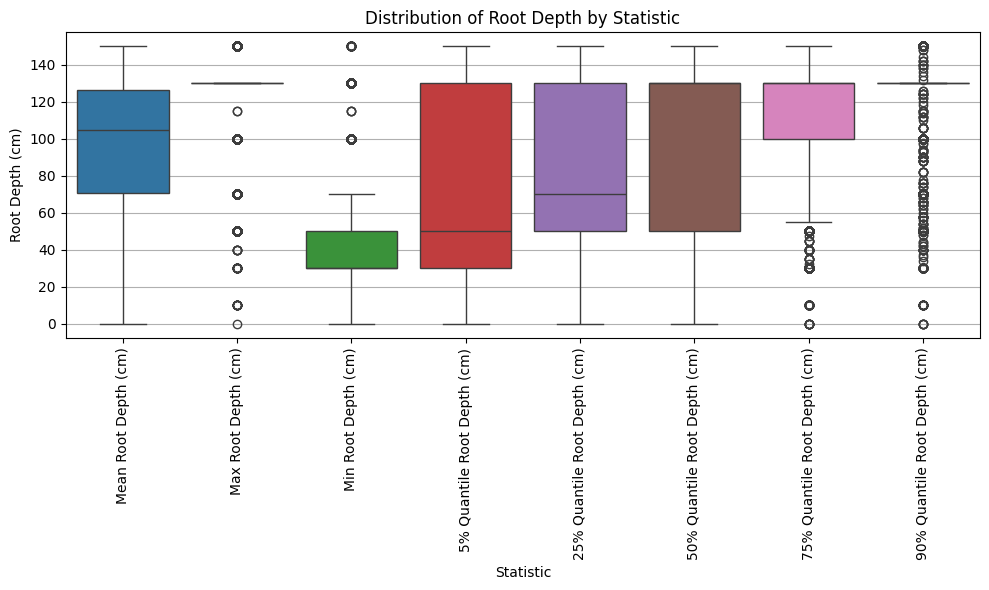

In [58]:
# Create boxplot of root depth stats
melted = static_df[root_depth_cols].melt(var_name='Statistic', value_name='Root Depth (cm)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='Root Depth (cm)', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of Root Depth by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

The mean root depth column looks good!

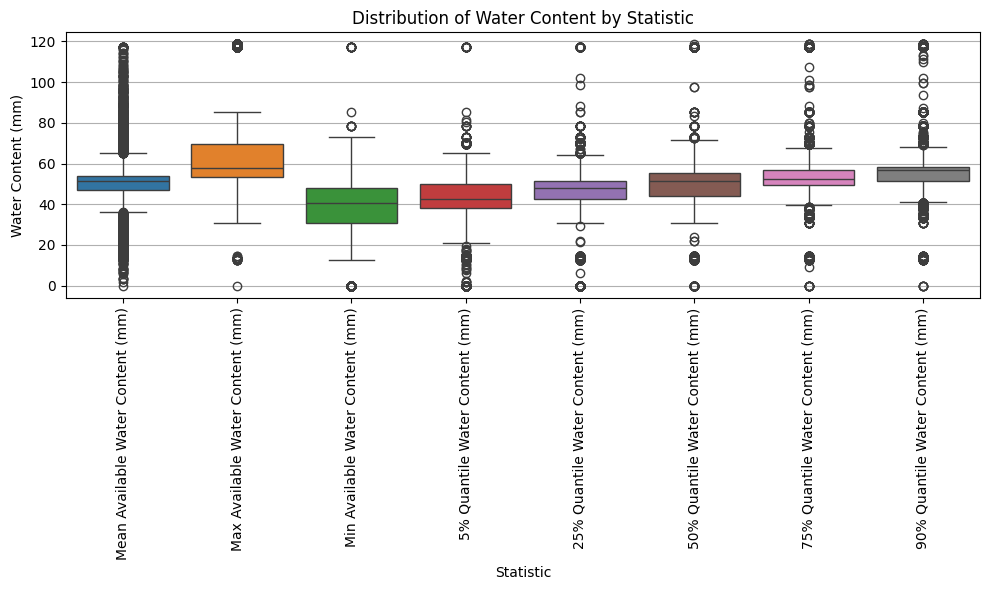

In [59]:
# Create boxplot of water content stats
melted = static_df[water_content_cols].melt(var_name='Statistic', value_name='Water Content (mm)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='Water Content (mm)', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of Water Content by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

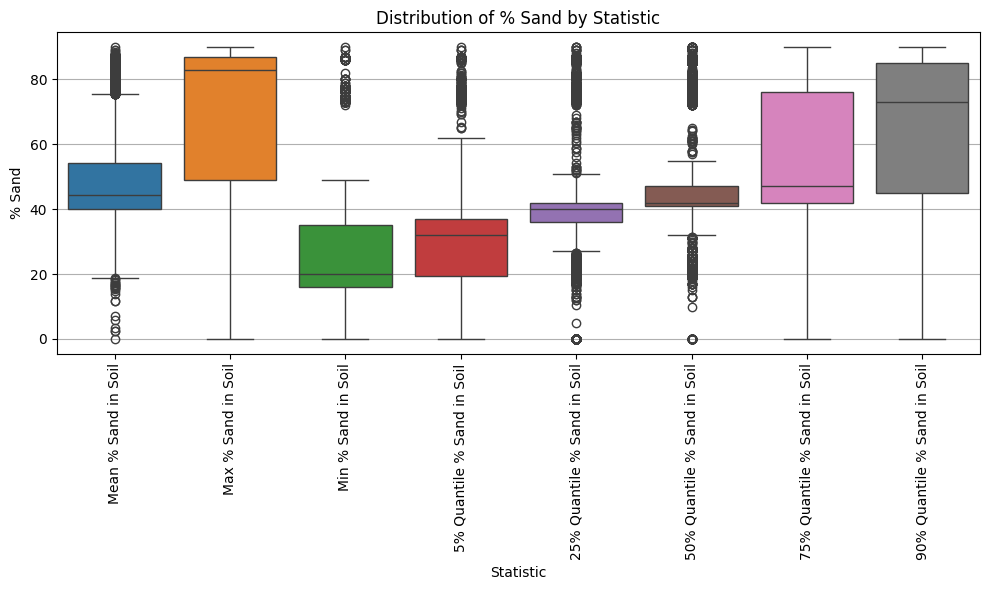

In [60]:
# Create boxplot of % sand stats
melted = static_df[sand_cols].melt(var_name='Statistic', value_name='% Sand')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Sand', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Sand by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

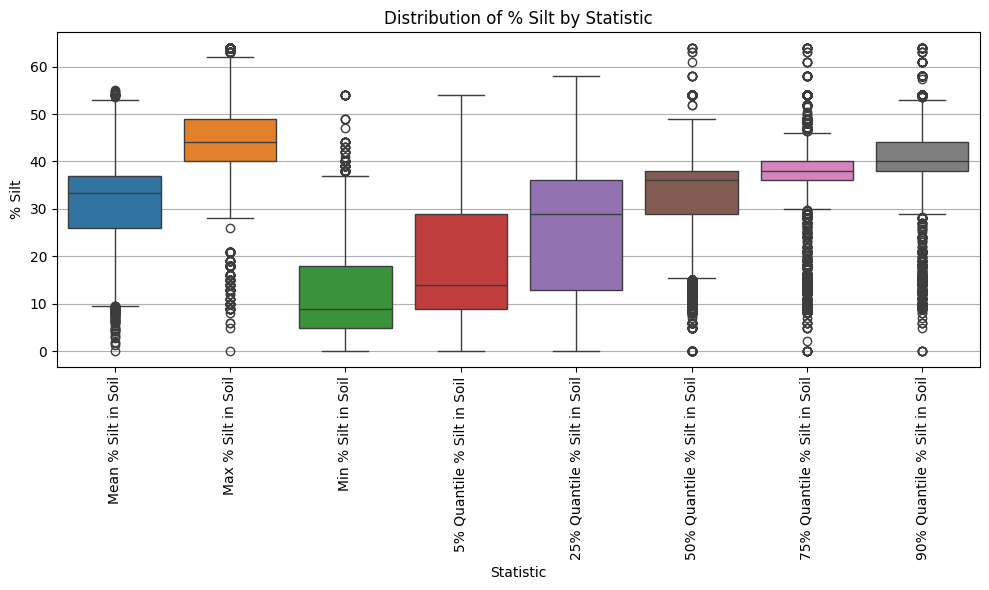

In [61]:
# Create boxplot of % silt stats
melted = static_df[silt_cols].melt(var_name='Statistic', value_name='% Silt')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Silt', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Silt by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

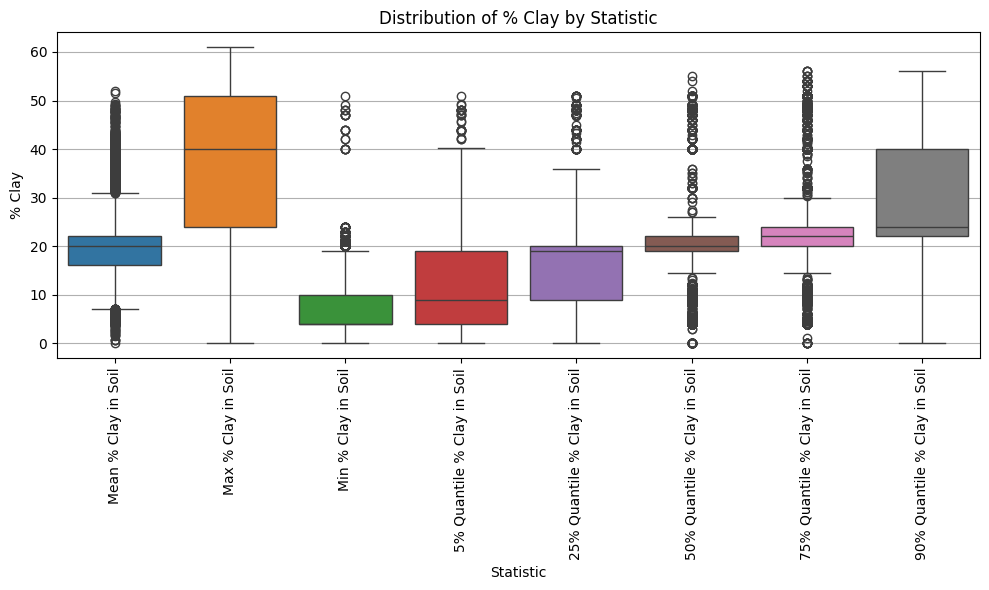

In [62]:
# Create boxplot of % clay stats
melted = static_df[clay_cols].melt(var_name='Statistic', value_name='% Clay')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Clay', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Clay by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

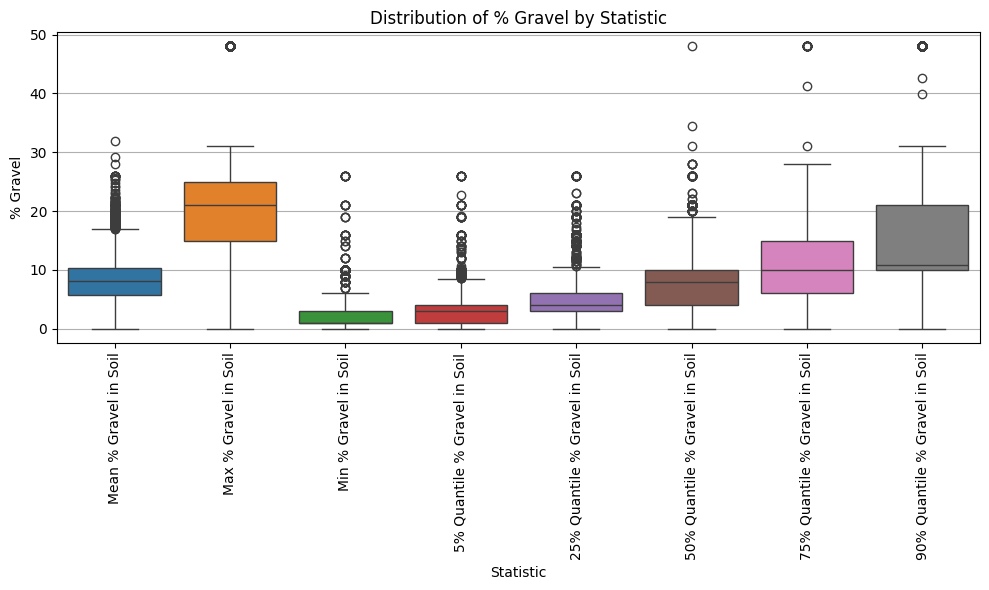

In [63]:
# Create boxplot of % gravel stats
melted = static_df[gravel_cols].melt(var_name='Statistic', value_name='% Gravel')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Gravel', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Gravel by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

**Major Takeaway:** Sand is the dominant particle size for this dataset.

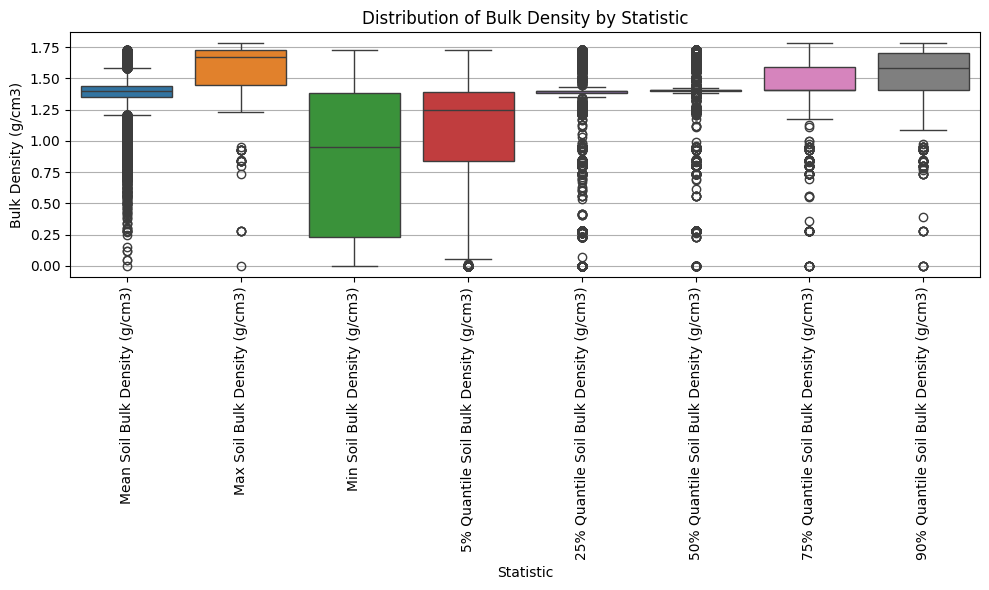

In [64]:
# Create boxplot of bulk density stats
melted = static_df[bulk_dens_cols].melt(var_name='Statistic', value_name='Bulk Density (g/cm3)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='Bulk Density (g/cm3)', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of Bulk Density by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

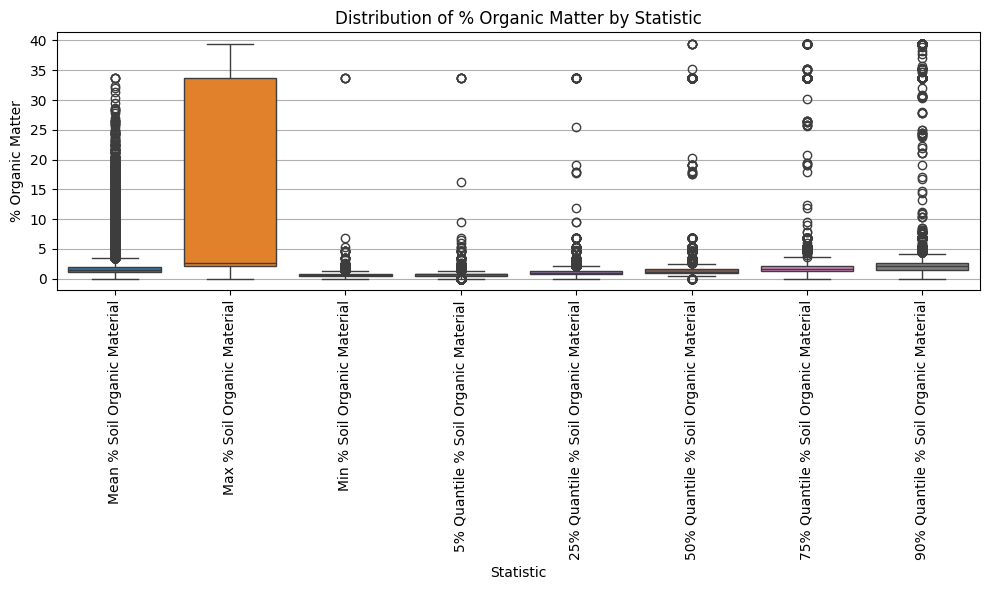

In [65]:
# Create boxplot of organic matter stats
melted = static_df[om_cols].melt(var_name='Statistic', value_name='% Organic Matter')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Statistic', y='% Organic Matter', hue = 'Statistic')
plt.xticks(rotation=90)
plt.title('Distribution of % Organic Matter by Statistic')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

#### Topography

In [66]:
# Identify columns of interest
topo_cols = [
    'Max Elevation (m)',
    'Mean Elevation (m)',
    'Min Elevation (m)',
    'Mean Terrain Slope (Degrees)',
    '% of Watershed Slope <3 Degrees',
    '% of Watershed Slope >15 Degrees',
    'Elongation Ratio',
    'Stream Density (1000km/km2)'
]

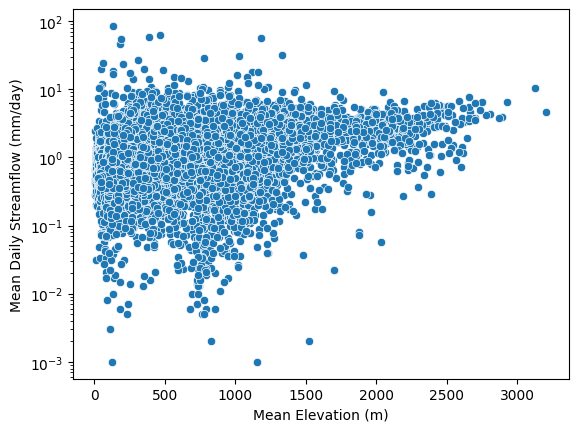

In [67]:
# scatterplot of mean discharge vs mean elevation
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Elevation (m)')
plt.yscale('log')
plt.show()

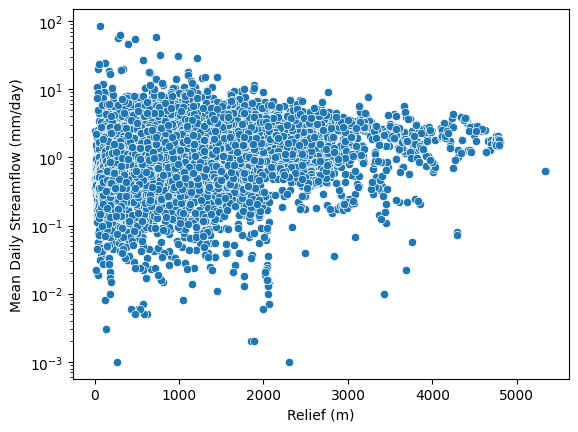

In [68]:
# Create a Relief (max - min elev) col
static_df['Relief (m)'] = static_df['Max Elevation (m)'] - static_df['Min Elevation (m)']

# scatterplot of mean discharge vs relief
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Relief (m)')
plt.yscale('log')
plt.show()

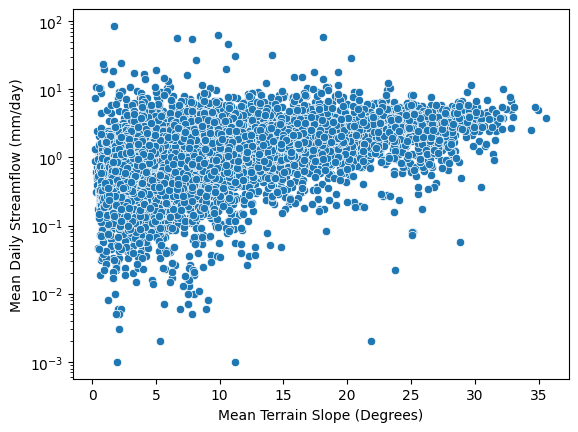

In [69]:
# scatterplot of mean discharge vs mean slope
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Mean Terrain Slope (Degrees)')
plt.yscale('log')
plt.show()

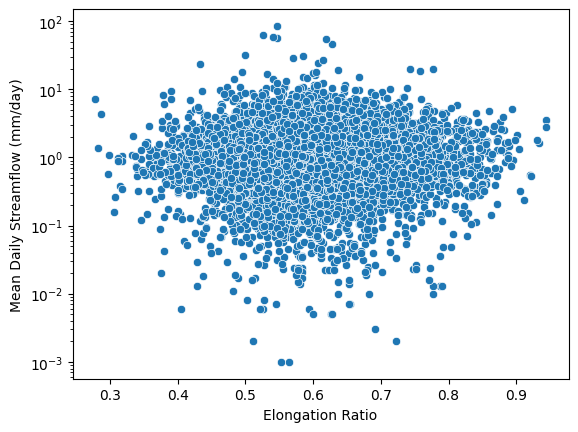

In [70]:
# scatterplot of mean discharge vs elongation ratio
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Elongation Ratio')
plt.yscale('log')
plt.show()

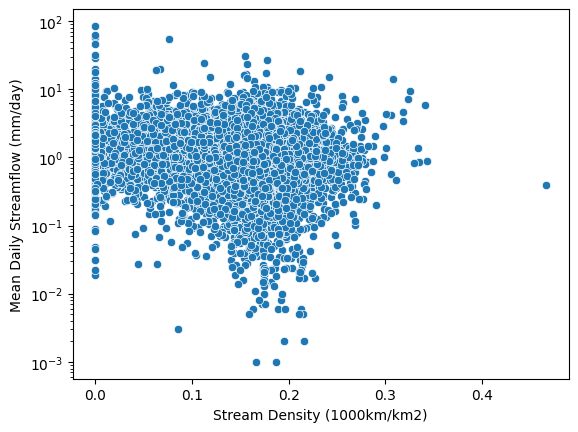

In [71]:
# scatterplot of mean discharge vs mean slope
sns.scatterplot(data = static_df,
                y = 'Mean Daily Streamflow (mm/day)',
                x = 'Stream Density (1000km/km2)')
plt.yscale('log')
plt.show()

#### Vegetation

In [72]:
# Identify columns of interest
lai_cols = [
    'Mean Jan Leaf-Area Index',
    'Mean Feb Leaf-Area Index',
    'Mean Mar Leaf-Area Index',
    'Mean Apr Leaf-Area Index',
    'Mean May Leaf-Area Index',
    'Mean Jun Leaf-Area Index',
    'Mean Jul Leaf-Area Index',
    'Mean Aug Leaf-Area Index',
    'Mean Sep Leaf-Area Index',
    'Mean Oct Leaf-Area Index',
    'Mean Nov Leaf-Area Index',
    'Mean Dec Leaf-Area Index',
    'Mean Leaf-Area Index',
]

ndvi_cols = [
    'Mean Jan NDVI',
    'Mean Feb NDVI',
    'Mean Mar NDVI',
    'Mean Apr NDVI',
    'Mean May NDVI',
    'Mean Jun NDVI',
    'Mean Jul NDVI',
    'Mean Aug NDVI',
    'Mean Sep NDVI',
    'Mean Oct NDVI',
    'Mean Nov NDVI',
    'Mean NDVI'
]

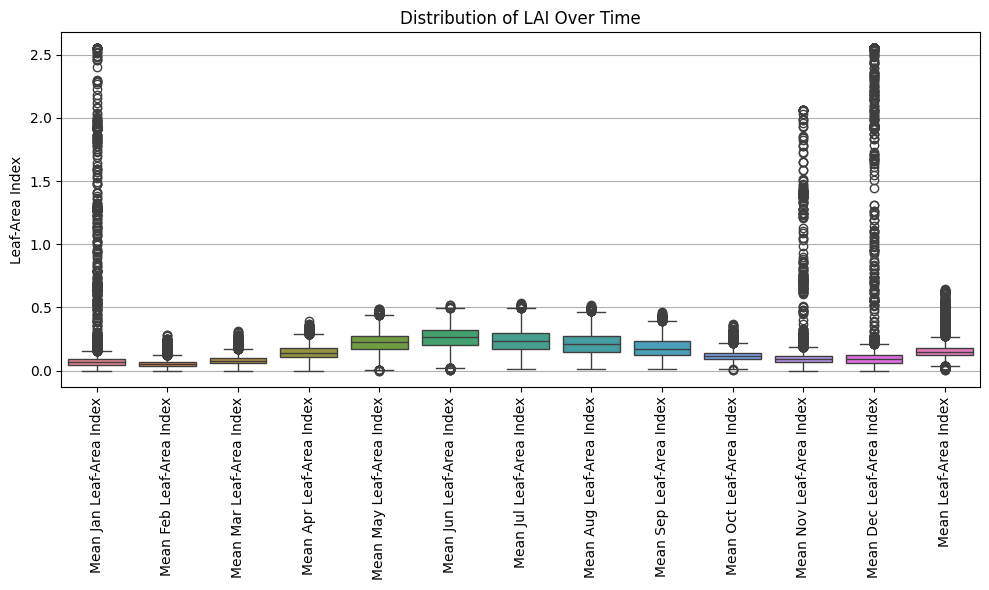

In [73]:
# Create boxplot of LAI
melted = static_df[lai_cols].melt(var_name='Month', value_name='Leaf-Area Index')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Leaf-Area Index', hue = 'Month')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Distribution of LAI Over Time')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

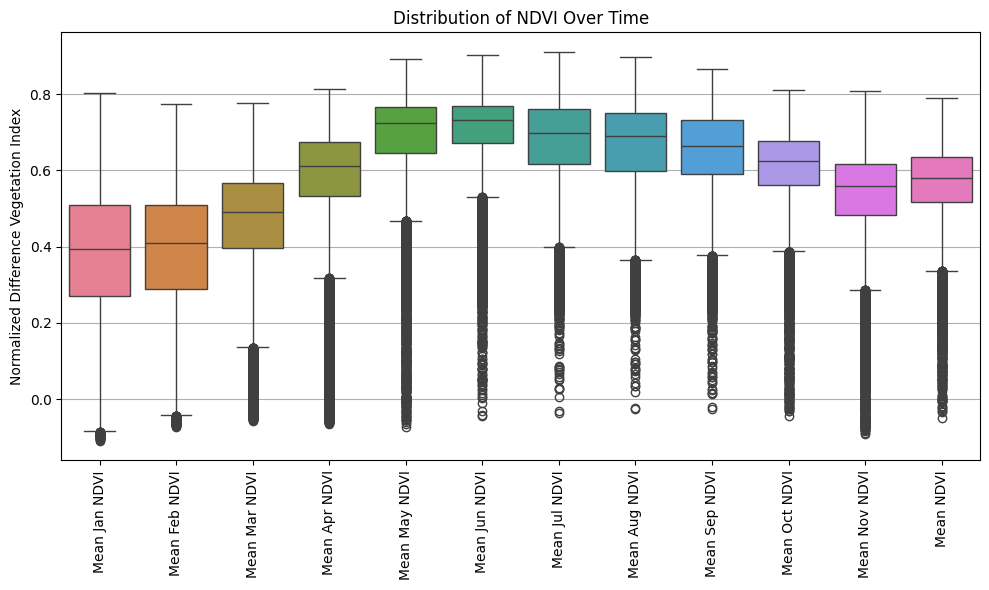

In [74]:
# Create boxplot of NDVI types
melted = static_df[ndvi_cols].melt(var_name='Month', value_name='Normalized Difference Vegetation Index')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Month', y='Normalized Difference Vegetation Index', hue = 'Month')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Distribution of NDVI Over Time')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

### Step 2b. Clustering EDA
This EDA is specific to the proposed features for the clustering algorithm. Since clustering is an unsupervised algorithm, there won't be any set way to measure the success of the clustering nor the best selected features. Therefore, we will try to (reasonably) include the most varaibles possible. We can use PCA for this.

In [121]:
# Scale data before applying PCA
scaler = RobustScaler()
x_data = static_df.select_dtypes(include='number').drop(columns = ['Mean Daily Streamflow (mm/day)']).dropna(axis = 'rows')

# Fit and transform to x data
scaled_x_data = scaler.fit_transform(x_data)
scaled_x_data.shape

(13450, 137)

In [123]:
# Set the number of components
principal = PCA(n_components = 35)
x_pca = principal.fit_transform(scaled_x_data)
x_pca.shape

(13450, 35)

### Step 2c. Mean Regression EDA
This EDA is specific to the proposed features for the mean regression algorithm. The target is *Mean Daily Streamflow (mm/day)*.

Let's start out with some correlation analysis. We will select features based on professional knowledge as well as the Spearman correlation coefficient, which is often helpful in environmental datasets given its monotonic nature.

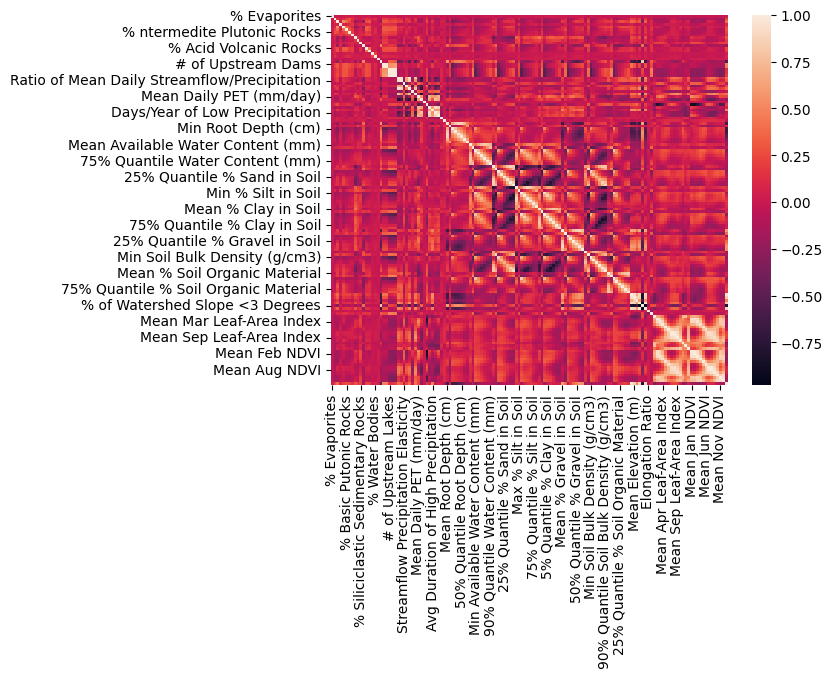

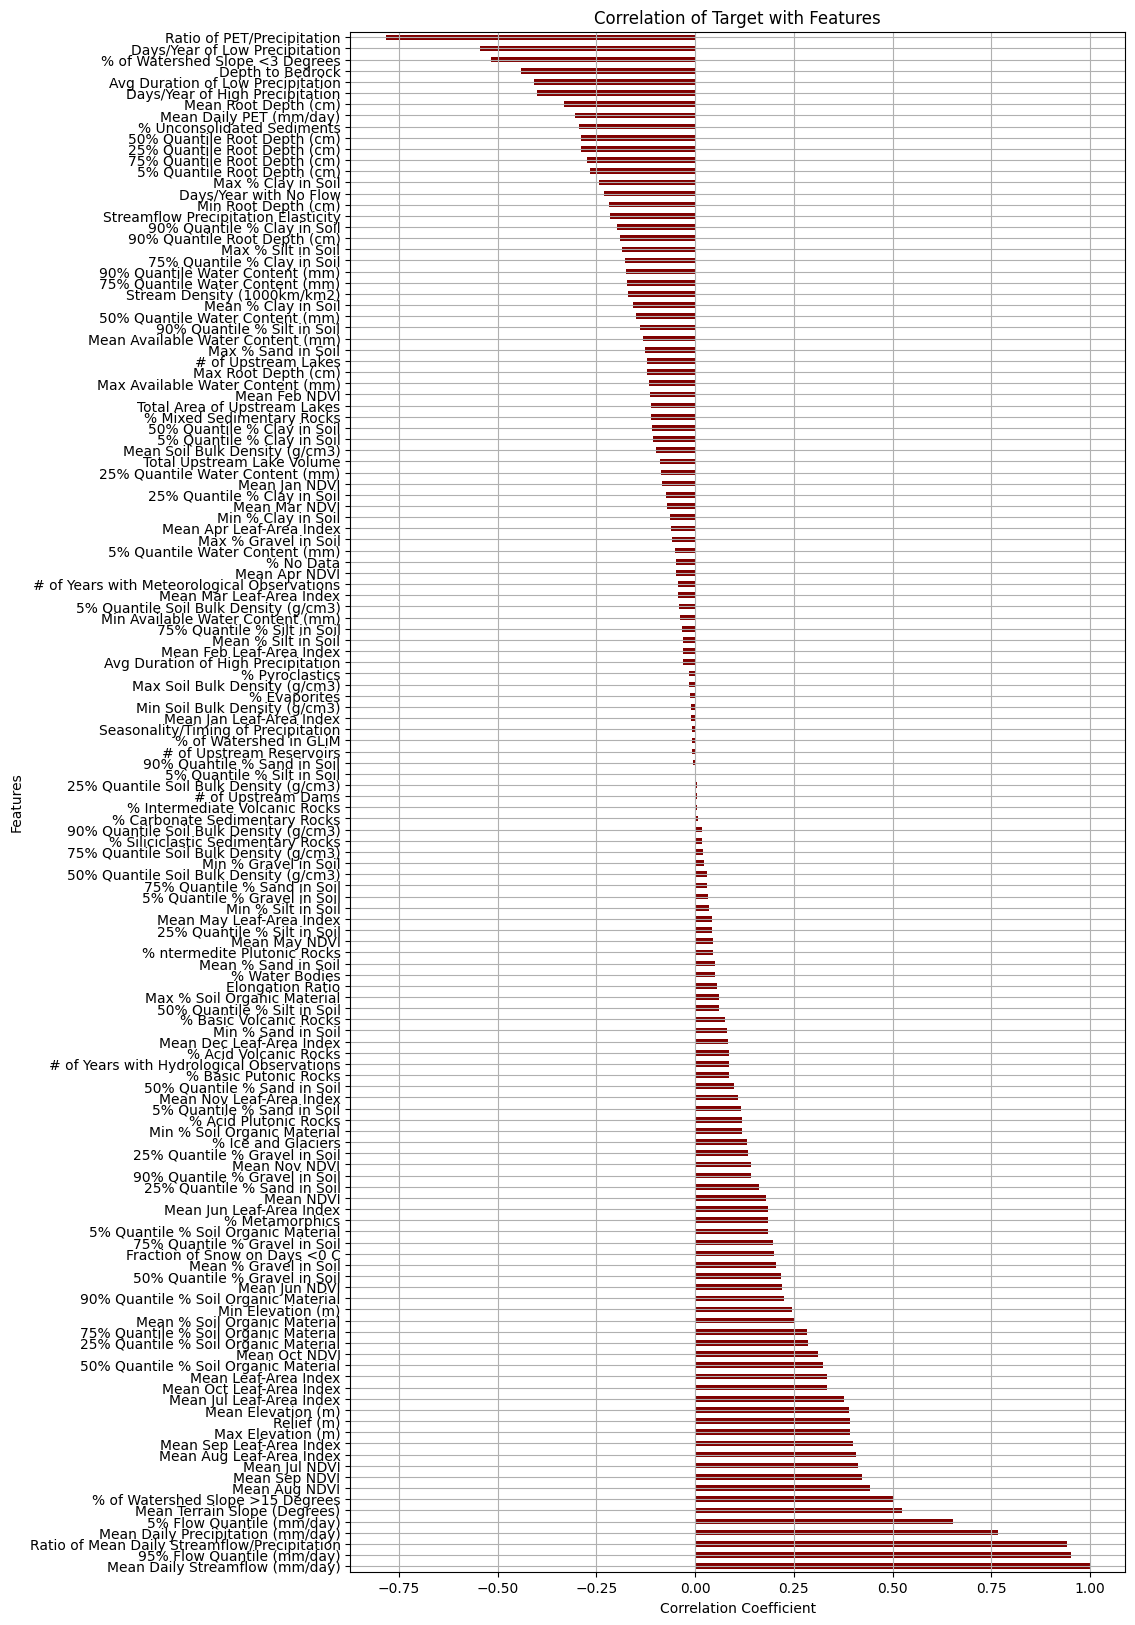

In [75]:
# Create correlation matrix and heatmap

# Select for only numerical values
num_df = static_df.select_dtypes(include='number')
corr = num_df.corr(method = 'spearman')
# Print correlation plot
sns.heatmap(corr)

# Select the target value row
target_corr = corr.loc['Mean Daily Streamflow (mm/day)'].sort_values(ascending = False)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 20))
target_corr.plot(kind='barh', color='maroon')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title(f'Correlation of Target with Features')
plt.grid()
plt.show()

Great! We're already seeing a lot of high correlations, as well as some we already anticipated. Let's look at the top 60 for now.

In [44]:
# Sort values in correlation matrix
target_corr_abs = target_corr.abs()
target_corr_abs = target_corr_abs.sort_values(ascending = False)

# Pick top 60 from the series
top_corr = target_corr_abs[0:60]
top_corr

Mean Daily Streamflow (mm/day)                  1.000000
95% Flow Quantile (mm/day)                      0.951859
Ratio of Mean Daily Streamflow/Precipitation    0.940892
Ratio of PET/Precipitation                      0.783792
Mean Daily Precipitation (mm/day)               0.767315
5% Flow Quantile (mm/day)                       0.652898
Days/Year of Low Precipitation                  0.545638
Mean Terrain Slope (Degrees)                    0.523292
% of Watershed Slope <3 Degrees                 0.516134
% of Watershed Slope >15 Degrees                0.502834
Mean Aug NDVI                                   0.443261
Depth to Bedrock                                0.441005
Mean Sep NDVI                                   0.421426
Mean Jul NDVI                                   0.411906
Avg Duration of Low Precipitation               0.408301
Mean Aug Leaf-Area Index                        0.406697
Days/Year of High Precipitation                 0.400402
Mean Sep Leaf-Area Index                        0.399098
Max Elevation (m)                               0.392237
Relief (m)                                      0.391829
Mean Elevation (m)                              0.389700
Mean Jul Leaf-Area Index                        0.376478
Mean Oct Leaf-Area Index                        0.334223
Mean Leaf-Area Index                            0.333752
Mean Root Depth (cm)                            0.332620
50% Quantile % Soil Organic Material            0.323928
Mean Oct NDVI                                   0.310052
Mean Daily PET (mm/day)                         0.303916
% Unconsolidated Sediments                      0.294328
50% Quantile Root Depth (cm)                    0.288496
25% Quantile Root Depth (cm)                    0.287690
25% Quantile % Soil Organic Material            0.285495
75% Quantile % Soil Organic Material            0.282565
75% Quantile Root Depth (cm)                    0.273373
5% Quantile Root Depth (cm)                     0.265450
Mean % Soil Organic Material                    0.252055
Max % Clay in Soil                              0.243858
Min Elevation (m)                               0.243626
Days/Year with No Flow                          0.229544
90% Quantile % Soil Organic Material            0.225373
Mean Jun NDVI                                   0.219312
Min Root Depth (cm)                             0.218098
50% Quantile % Gravel in Soil                   0.216350
Streamflow Precipitation Elasticity             0.216348
Mean % Gravel in Soil                           0.205816
Fraction of Snow on Days <0 C                   0.200190
90% Quantile % Clay in Soil                     0.197952
75% Quantile % Gravel in Soil                   0.196669
90% Quantile Root Depth (cm)                    0.191057
5% Quantile % Soil Organic Material             0.186325
Max % Silt in Soil                              0.185481
% Metamorphics                                  0.183345
Mean Jun Leaf-Area Index                        0.182468
Mean NDVI                                       0.178185
75% Quantile % Clay in Soil                     0.177807
90% Quantile Water Content (mm)                 0.176542
75% Quantile Water Content (mm)                 0.172428
Stream Density (1000km/km2)                     0.171234
25% Quantile % Sand in Soil                     0.161996
Mean % Clay in Soil                             0.157627
Name: Mean Daily Streamflow (mm/day), dtype: float64

Since some columns have multple repeats of a characteristic, such as multiple statistics, we're going to look at a heatmap of correlations to check for multicolinearity.

In [83]:
# Turn identified features into a list
selected_features = top_corr.index.tolist()

# Select correlation matrix for only selected_features
filtered_corr1 = corr.loc[selected_features, selected_features]

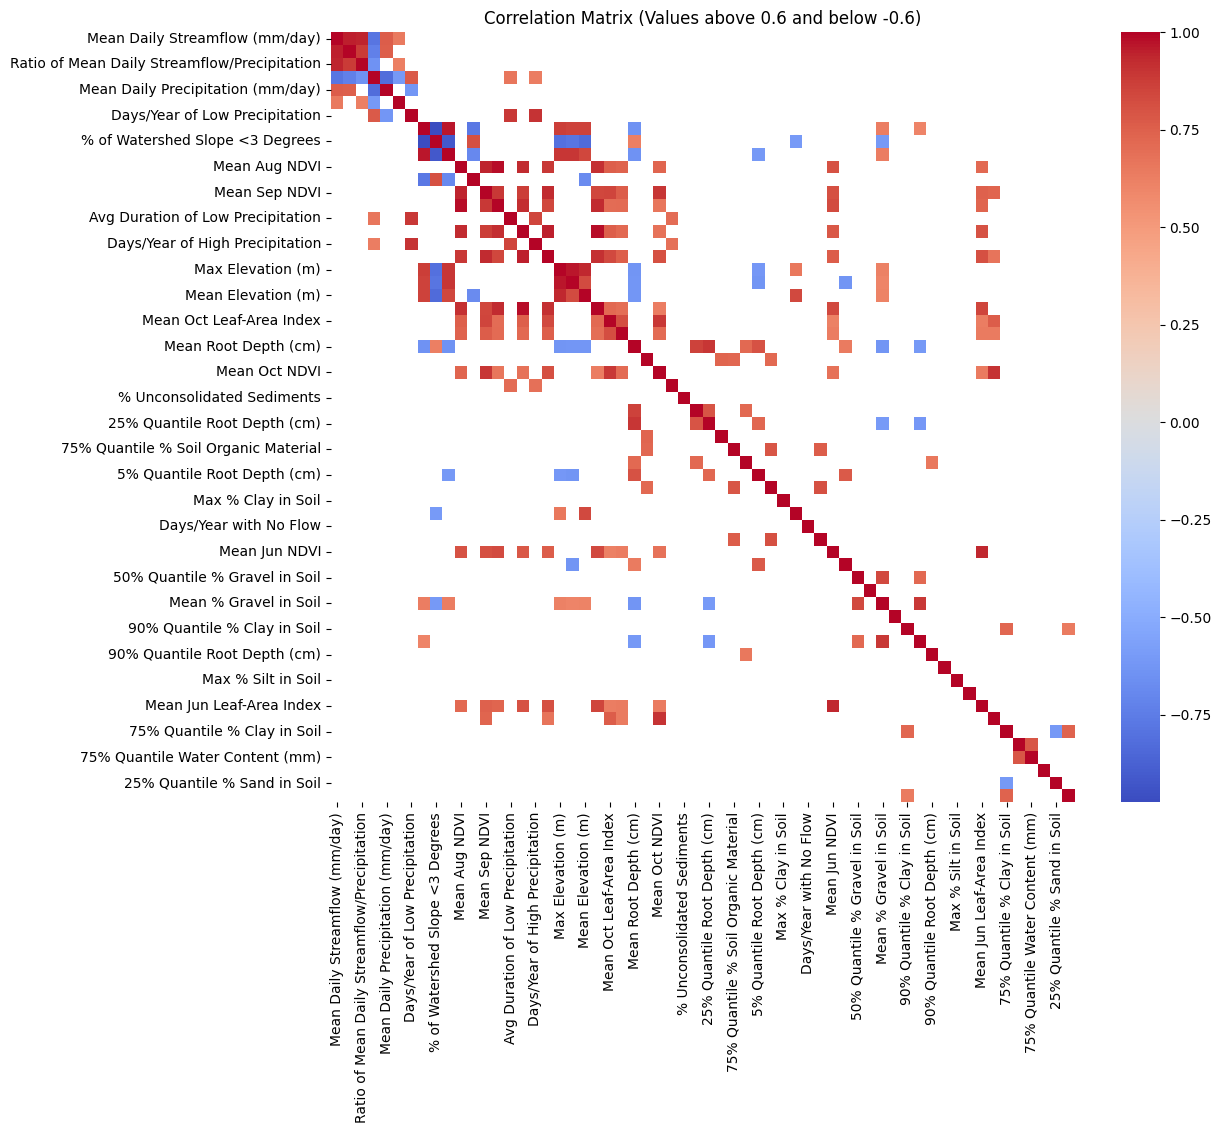

Mean Daily Streamflow (mm/day)  \
Mean Daily Streamflow (mm/day)                                      1.000000   
95% Flow Quantile (mm/day)                                          0.951784   
Ratio of Mean Daily Streamflow/Precipitation                        0.940800   
Ratio of PET/Precipitation                                         -0.784273   
Mean Daily Precipitation (mm/day)                                   0.767477   
5% Flow Quantile (mm/day)                                           0.652487   
Days/Year of Low Precipitation                                           NaN   
Mean Terrain Slope (Degrees)                                             NaN   
% of Watershed Slope <3 Degrees                                          NaN   
% of Watershed Slope >15 Degrees                                         NaN   
Mean Aug NDVI                                                            NaN   
Depth to Bedrock                                                         NaN   
Mean Sep NDVI                                                            NaN   
Mean Jul NDVI                                                            NaN   
Avg Duration of Low Precipitation                                        NaN   
Mean Aug Leaf-Area Index                                                 NaN   
Days/Year of High Precipitation                                          NaN   
Mean Sep Leaf-Area Index                                                 NaN   
Max Elevation (m)                                                        NaN   
Relief (m)                                                               NaN   
Mean Elevation (m)                                                       NaN   
Mean Jul Leaf-Area Index                                                 NaN   
Mean Oct Leaf-Area Index                                                 NaN   
Mean Leaf-Area Index                                                     NaN   
Mean Root Depth (cm)                                                     NaN   
50% Quantile % Soil Organic Material                                     NaN   
Mean Oct NDVI                                                            NaN   
Mean Daily PET (mm/day)                                                  NaN   
% Unconsolidated Sediments                                               NaN   
50% Quantile Root Depth (cm)                                             NaN   
25% Quantile Root Depth (cm)                                             NaN   
25% Quantile % Soil Organic Material                                     NaN   
75% Quantile % Soil Organic Material                                     NaN   
75% Quantile Root Depth (cm)                                             NaN   
5% Quantile Root Depth (cm)                                              NaN   
Mean % Soil Organic Material                                             NaN   
Max % Clay in Soil                                                       NaN   
Min Elevation (m)                                                        NaN   
Days/Year with No Flow                                                   NaN   
90% Quantile % Soil Organic Material                                     NaN   
Mean Jun NDVI                                                            NaN   
Min Root Depth (cm)                                                      NaN   
50% Quantile % Gravel in Soil                                            NaN   
Streamflow Precipitation Elasticity                                      NaN   
Mean % Gravel in Soil                                                    NaN   
Fraction of Snow on Days <0 C                                            NaN   
90% Quantile % Clay in Soil                                              NaN   
75% Quantile % Gravel in Soil                                            NaN   
90% Quantile Root Depth (cm)                                             NaN   
5% Quantile % Soil Organic Material           

In [84]:
# Filter correlation matrix for values above 0.6 and below -0.6
high_corr1 = filtered_corr1[(filtered_corr1 > 0.6) | (filtered_corr1 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(12,10))
sns.heatmap(high_corr1,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

# Print correlation values
high_corr1

In [88]:
# Unstack the matrix to get pairwise correlations
high_corr_pairs = high_corr1.unstack().dropna()

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)]
high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated()]

# Sort by absolute correlation
high_corr_pairs = high_corr_pairs.reindex(high_corr_pairs.abs().sort_values(ascending=False).index)

# Temporarily increase display limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(high_corr_pairs)

Mean Aug NDVI                                 Mean Jul NDVI                                   0.981735
Mean Jul NDVI                                 Mean Aug NDVI                                   0.981735
Mean Aug Leaf-Area Index                      Mean Jul Leaf-Area Index                        0.980069
Mean Jul Leaf-Area Index                      Mean Aug Leaf-Area Index                        0.980069
% of Watershed Slope <3 Degrees               Mean Terrain Slope (Degrees)                   -0.975162
Mean Terrain Slope (Degrees)                  % of Watershed Slope <3 Degrees                -0.975162
                                              % of Watershed Slope >15 Degrees                0.965506
% of Watershed Slope >15 Degrees              Mean Terrain Slope (Degrees)                    0.965506
Max Elevation (m)                             Relief (m)                                      0.961588
Relief (m)                                    Max Elevation (m)          

In [91]:
# Drop selected features
reg_corr_df2 = reg_corr_df.drop(columns = [
    'Mean Jul NDVI',
    'Mean Jul Leaf-Area Index',
    '% of Watershed Slope <3 Degrees',
    '% of Watershed Slope >15 Degrees',
    'Max Elevation (m)',
    '95% Flow Quantile (mm/day)',
    'Mean Sep Leaf-Area Index',
    'Ratio of Mean Daily Streamflow/Precipitation',
    'Mean Sep NDVI',
    'Mean Jun Leaf-Area Index',
    'Mean Jun NDVI',
    'Mean Jul NDVI',
    'Mean Jul Leaf-Area Index',
    'Mean Sep NDVI',
    'Mean Sep Leaf-Area Index',
    'Mean Aug Leaf-Area Index',
    'Days/Year of High Precipitation',
    'Mean Oct NDVI',
    '25% Quantile Root Depth',
    'Avg Duration of Low Precipitation',
    'Mean Oct Leaf-Area Index',
    '75% Quantile % Gravel in Soil',
    'Mean Root Depth (cm)',
    # Left relief, slope, and mean elev in on purpose
    'Days/Year of High Precipitation',
    '50% Quantile % Gravel in Soil',
    'Mean Oct Leaf-Area Index',
    'Mean Daily Precipitation (mm/day)',
    '90% Quantile % Soil Organic Material',
    '5% Quantile Root Depth (cm)',
    '25% Quantile Root Depth',
    '75% Quantile % Soil Organic Material',
    '90% Quantile Water Content (mm)',
    # Kept Days/Year of Low Precip on purpose
    '5% Quantile Root Depth (cm)',
    'Min Root Depth (cm)',
    '75% Quantile % Clay in Soil',
    '25% Quantile % Soil Organic Material'
])

KeyError: "['Mean Jul NDVI', 'Mean Jul Leaf-Area Index', 'Max Elevation (m)', '95% Flow Quantile (mm/day)', 'Mean Sep Leaf-Area Index', 'Ratio of Mean Daily Streamflow/Precipitation', 'Mean Sep NDVI', 'Mean Jun Leaf-Area Index', 'Mean Jun NDVI', 'Mean Jul NDVI', 'Mean Jul Leaf-Area Index', 'Mean Sep NDVI', 'Mean Sep Leaf-Area Index', 'Mean Oct NDVI', '25% Quantile Root Depth', 'Mean Oct Leaf-Area Index', '75% Quantile % Gravel in Soil', 'Mean Oct Leaf-Area Index', '90% Quantile % Soil Organic Material', '5% Quantile Root Depth (cm)', '25% Quantile Root Depth', '75% Quantile % Soil Organic Material', '5% Quantile Root Depth (cm)', 'Min Root Depth (cm)', '75% Quantile % Clay in Soil', '25% Quantile % Soil Organic Material'] not found in axis"

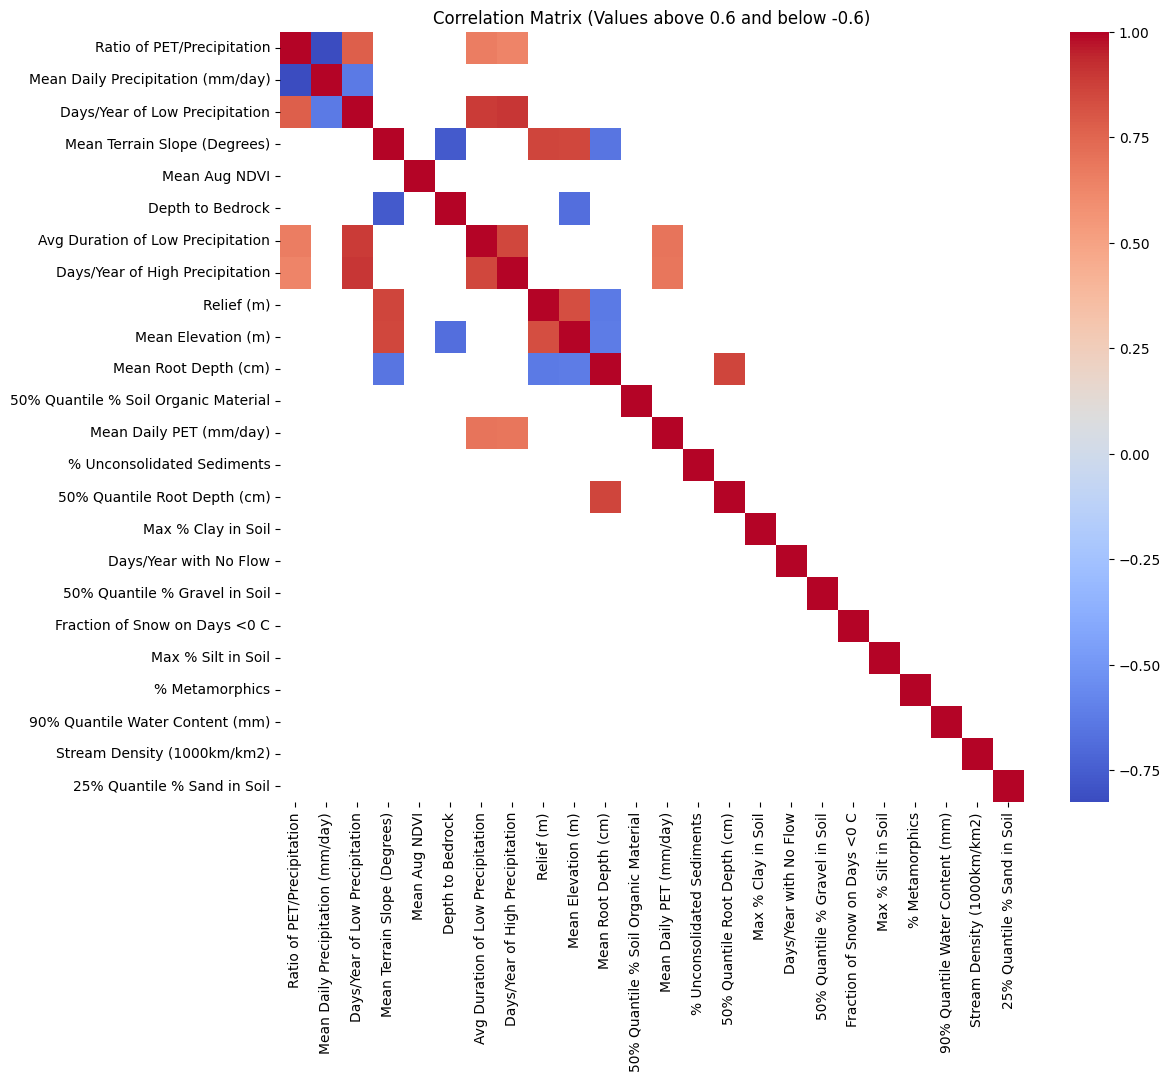

In [93]:
# Again: Filter correlation matrix for values above 0.6 and below -0.6
corr2 = reg_corr_df2.corr(method = 'spearman')
high_corr2 = corr2[(corr2 > 0.6) | (corr2 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(12,10))
sns.heatmap(high_corr2,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

In [94]:
# Unstack the matrix to get pairwise correlations
high_corr_pairs = high_corr2.unstack().dropna()

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) != high_corr_pairs.index.get_level_values(1)]
high_corr_pairs = high_corr_pairs[~high_corr_pairs.index.duplicated()]

# Sort by absolute correlation
high_corr_pairs = high_corr_pairs.reindex(high_corr_pairs.abs().sort_values(ascending=False).index)

# Temporarily increase display limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(high_corr_pairs)

Days/Year of High Precipitation    Days/Year of Low Precipitation       0.903036
Days/Year of Low Precipitation     Days/Year of High Precipitation      0.903036
                                   Avg Duration of Low Precipitation    0.888428
Avg Duration of Low Precipitation  Days/Year of Low Precipitation       0.888428
Mean Root Depth (cm)               50% Quantile Root Depth (cm)         0.860529
50% Quantile Root Depth (cm)       Mean Root Depth (cm)                 0.860529
Mean Terrain Slope (Degrees)       Relief (m)                           0.859269
Relief (m)                         Mean Terrain Slope (Degrees)         0.859269
Mean Elevation (m)                 Mean Terrain Slope (Degrees)         0.856547
Mean Terrain Slope (Degrees)       Mean Elevation (m)                   0.856547
Avg Duration of Low Precipitation  Days/Year of High Precipitation      0.850635
Days/Year of High Precipitation    Avg Duration of Low Precipitation    0.850635
Relief (m)                  

In [96]:
# Drop selected features
reg_corr_df3 = reg_corr_df2.drop(columns = [
    'Days/Year of High Precipitation',
    'Avg Duration of Low Precipitation',
    '50% Quantile Root Depth (cm)',
    'Relief (m)',
    'Mean Daily Precipitation (mm/day)',
    # Keep depth to bedrock
    'Mean Daily PET (mm/day)',
    'Days/Year of High Precipitation',
    'Mean Root Depth (cm)' # too many high corrs
])

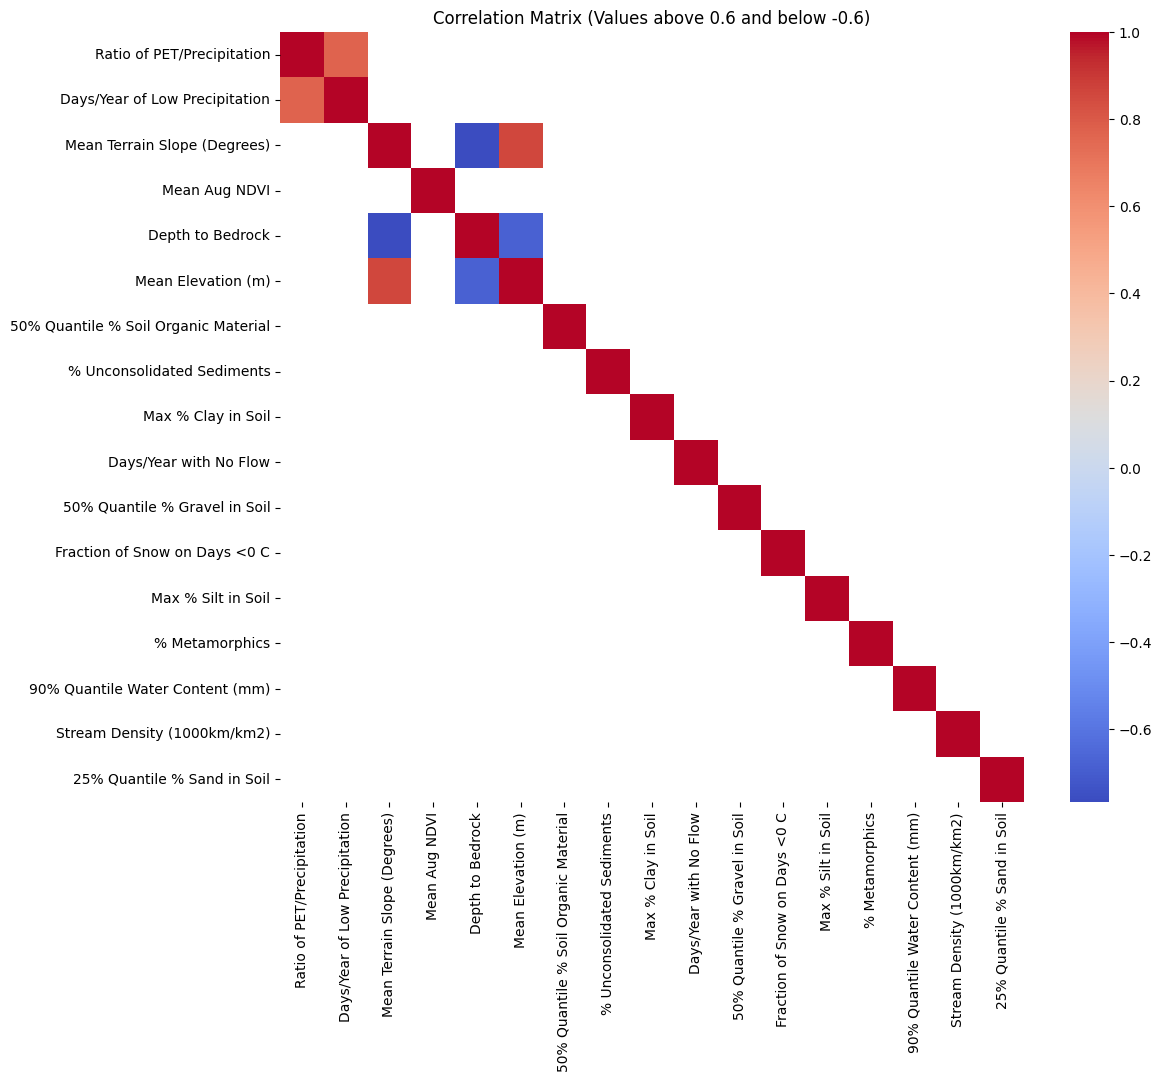

In [97]:
# Again: Filter correlation matrix for values above 0.6 and below -0.6
corr3 = reg_corr_df3.corr(method = 'spearman')
high_corr3 = corr3[(corr3 > 0.6) | (corr3 < -0.6)]

# Create heatmap for filtered matrix
plt.figure(figsize=(12,10))
sns.heatmap(high_corr3,
            cmap = 'coolwarm')
plt.title('Correlation Matrix (Values above 0.6 and below -0.6)')
plt.show()

In [98]:
# Show final df
reg_corr_df3

Ratio of PET/Precipitation  Days/Year of Low Precipitation  \
0                           0.395                         198.993   
1                           0.390                         204.041   
2                           0.411                         202.001   
3                           0.384                         205.803   
4                           0.448                         201.796   
...                           ...                             ...   
13511                       1.354                         270.637   
13512                       1.270                         268.322   
13513                       1.494                         273.598   
13514                       1.856                         281.568   
13515                       1.640                         271.607   

       Mean Terrain Slope (Degrees)  Mean Aug NDVI  Depth to Bedrock  \
0                            24.122          0.645             1.124   
1                            26.095          0.696             0.565   
2                            25.735          0.655             0.593   
3                            27.324          0.657             0.564   
4                            28.647          0.612             0.445   
...                             ...            ...               ...   
13511                        11.810          0.796             0.921   
13512                        19.438          0.689             0.808   
13513                         9.655          0.694             0.942   
13514                         1.223          0.425             4.069   
13515                         2.584          0.526             1.073   

       Mean Elevation (m)  50% Quantile % Soil Organic Material  \
0                1874.076                                  0.90   
1                1773.178                                  1.45   
2                1843.003                                  1.61   
3                1890.429                                  1.53   
4                1772.902                                  2.13   
...                   ...                                   ...   
13511             564.291                                  1.17   
13512             749.565                                  3.02   
13513             653.127                                  1.17   
13514             155.662                                  2.09   
13515             234.422                                  2.09   

       % Unconsolidated Sediments  Max % Clay in Soil  Days/Year with No Flow  \
0                          22.064                40.0                   0.000   
1                           0.000                20.0                   0.000   
2                           0.070                51.0                   0.000   
3                           0.000                51.0                   0.000   
4                           0.000                51.0                   0.000   
...                           ...                 ...                     ...   
13511                       0.000                48.0                   0.777   
13512                       0.000                48.0                   0.834   
13513                       0.000                48.0                   0.651   
13514                       0.000                45.0                   0.543   
13515                       0.000                23.0                   0.000   

       50% Quantile % Gravel in Soil  Fraction of Snow on Days <0 C  \
0                                4.0                          0.326   
1                               10.0                          0.332   
2                               10.0                          0.337   
3                               13.0                          0.361   
4                               16.0                          0.200   
...                              ...                            ...   
13511                           10.0  